>Installing packages...

In [1]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib
!pip install sklearn

In [2]:
import tensorflow as tf

tf.compat.v1.enable_eager_execution()

In [3]:
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

> Checking if GPU device is linked.

In [4]:
device_name = tf.test.gpu_device_name()
if device_name != "/device:GPU:0":
    raise SystemError("GPU device not found")
    
print("Found GPU at: {}".format(device_name))

Found GPU at: /device:GPU:0


Connecting to google drive...

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


> Downloading MNIST dataset...

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

## Exploring The dataset

In [7]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [8]:
print(x_train[100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 25

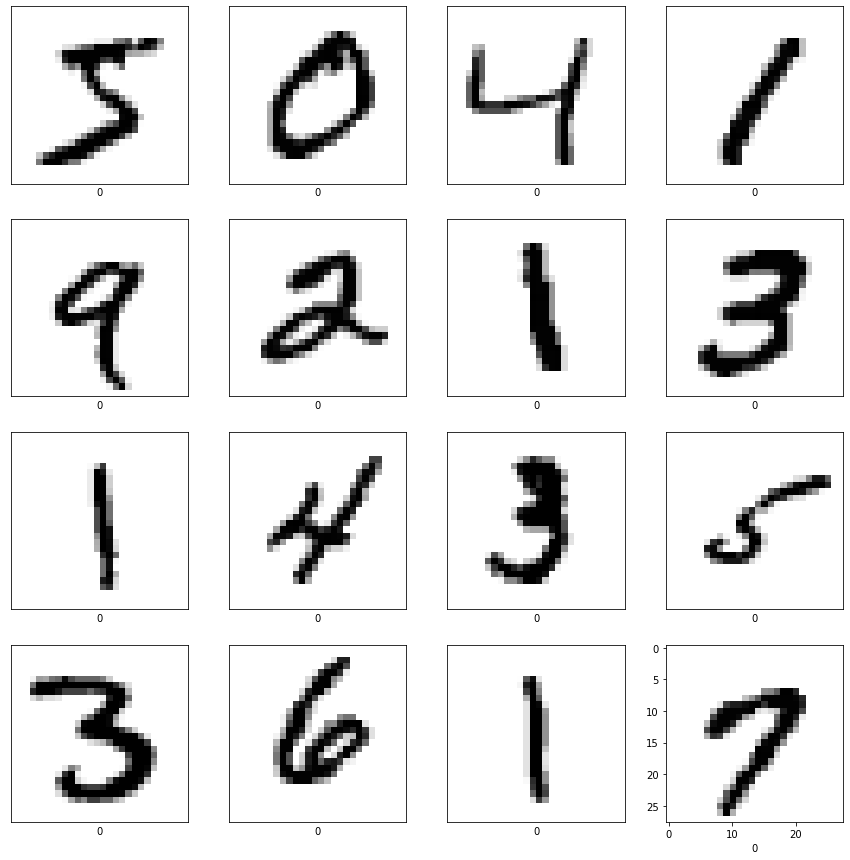

In [9]:
numbers_to_display = 16
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    train_label = y_train[plot_index].argmax()
    plt.xticks([])
    plt.yticks([])
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_train[plot_index].reshape((28, 28)), cmap=plt.cm.binary)
    plt.xlabel(train_label)

plt.grid(False)
plt.show()

>Reshaping data to add color channel

In [10]:
x_train = x_train.reshape((-1, 28, 28, 1)).astype('float64') 
x_test = x_test.reshape((-1, 28, 28, 1)).astype('float64') 

In [11]:
print("x_train: ", x_train.dtype, x_train.shape)
print("x_test: ", x_test.dtype, x_test.shape)

x_train:  float64 (60000, 28, 28, 1)
x_test:  float64 (10000, 28, 28, 1)


In [12]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [13]:
print(y_train[100])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
print("y_train", y_train.shape)
print("y_test", y_test.shape)

y_train (60000, 10)
y_test (10000, 10)


## Creating, compiling and training the model

In [15]:
def CreateModel():
    model = tf.keras.Sequential()
    dropout_prob = 0.2

    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation="relu", padding="same", input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPool2D(strides=(2, 2)))

    model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=5, activation="relu", padding="same"))
    model.add(tf.keras.layers.MaxPool2D(strides=(2, 2)))

    model.add(tf.keras.layers.Flatten())

    model.add(tf.keras.layers.Dense(units=128, activation="relu"))
    model.add(tf.keras.layers.Dropout(dropout_prob))
    
    model.add(tf.keras.layers.Dense(units=10, activation="softmax", name="output_layer"))
    
    return model

In [16]:

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="handwritten_digits",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


with tf.device("/gpu:0"):
    Model = CreateModel()

    Model.compile(
        loss="bce",
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"])
  
    # Model.summary()

    history = Model.fit(x=x_train,
                        y=y_train,
                        epochs=20,
                        batch_size=256,
                        validation_data=(x_test, y_test),
                        shuffle=True,
                        callbacks=[model_checkpoint])

Epoch 1/20
235/235 [==============================] - 5s 14ms/step - loss: 0.1143 - accuracy: 0.7986 - val_loss: 0.0255 - val_accuracy: 0.9599
INFO:tensorflow:Assets written to: handwritten_digits/assets
Epoch 2/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0276 - accuracy: 0.9622 - val_loss: 0.0144 - val_accuracy: 0.9792
INFO:tensorflow:Assets written to: handwritten_digits/assets
Epoch 3/20
235/235 [==============================] - 3s 13ms/step - loss: 0.0185 - accuracy: 0.9750 - val_loss: 0.0113 - val_accuracy: 0.9833
INFO:tensorflow:Assets written to: handwritten_digits/assets
Epoch 4/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0149 - accuracy: 0.9797 - val_loss: 0.0090 - val_accuracy: 0.9866
INFO:tensorflow:Assets written to: handwritten_digits/assets
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.0122 - accuracy: 0.9834 - val_loss: 0.0085 - val_accuracy: 0.9866
Epoch 6/20
235/235 [=====================

In [17]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         3208      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
flatten (Flatten)            (None, 392)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

## Evaluating model accuracy

>Loading saved checkpoint model with highest val_accuracy

In [18]:
Model = tf.keras.models.load_model("handwritten_digits")

> Evaluating Model accuracy on Validation data => getting 89% on testing data

In [19]:
Model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0055 - accuracy: 0.9927


[0.0054565900936722755, 0.9926999807357788]

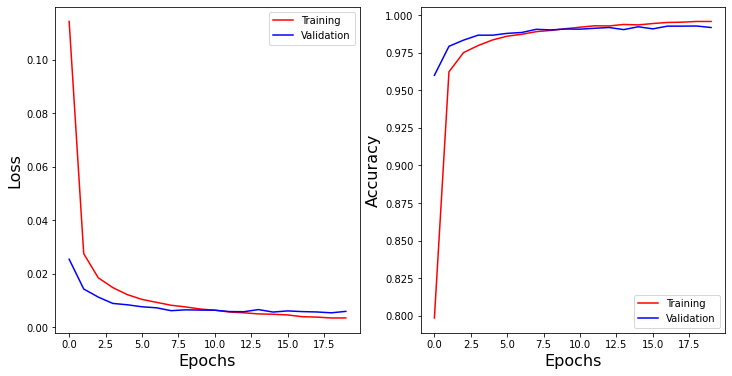

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(len(loss))

fig = plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

ax1.plot(epochs, loss, 'r', label='Training')
ax1.plot(epochs, val_loss, 'b', label='Validation')
ax1.set_xlabel('Epochs', size=16)
ax1.set_ylabel('Loss', size=16)
ax1.legend()

ax2.plot(epochs, accuracy, 'r', label='Training')
ax2.plot(epochs, val_accuracy, 'b', label='Validation')
ax2.set_xlabel('Epochs', size=16)
ax2.set_ylabel('Accuracy', size=16)
ax2.legend()
plt.show()

>Testing Model on samples from validation data

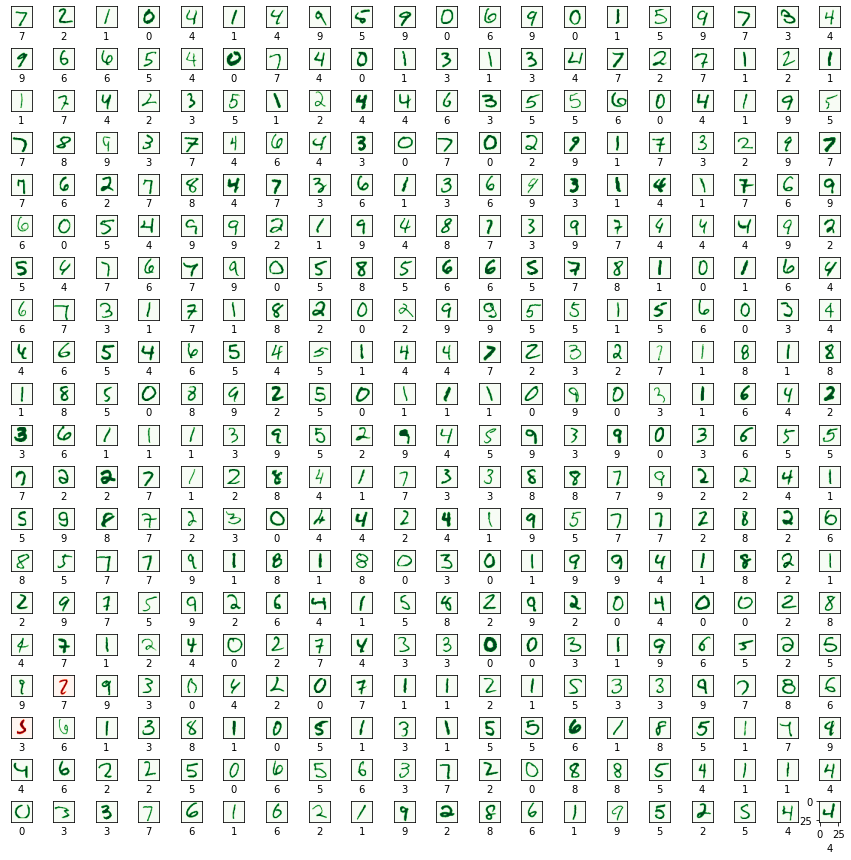

In [21]:
y_predict = Model.predict(x_test)

numbers_to_display = 400
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = y_predict[plot_index].argmax()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index].argmax() else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

> Plotting confusion matrix

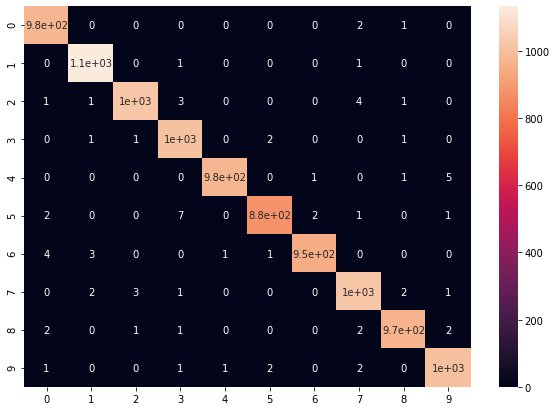

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = np.argmax(Model.predict(x_test), axis=1)
confusion =  confusion_matrix(y_test.argmax(axis=1), y_pred)

df_confusion = pd.DataFrame(confusion, index = [str(i) for i in range(0, 10)],
                     columns = [str(i) for i in range(0, 10)])
plt.figure(figsize = (10,7))
sn.heatmap(df_confusion, annot=True)

In [23]:
tf.keras.models.save_model(Model, '/content/drive/MyDrive/HandWritten_Digits_Model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/HandWritten_Digits_Model/assets
